In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data=pd.read_csv("./train.csv")
labels=pd.read_csv("./labels_train.csv")

In [3]:
data.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [4]:
labels.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


In [5]:
len(data),len(labels)

(3999, 3999)

In [6]:
unique, counts = np.unique(labels, return_counts=True)
print(list(zip(unique, counts)))


[(0, 3445), (1, 554)]


In [7]:
data.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [8]:
len(np.unique(data['Cholesterol'])),len(np.unique(data['TroponinI'])),len(np.unique(data['TroponinT']))

(145, 138, 416)

In [9]:
data.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

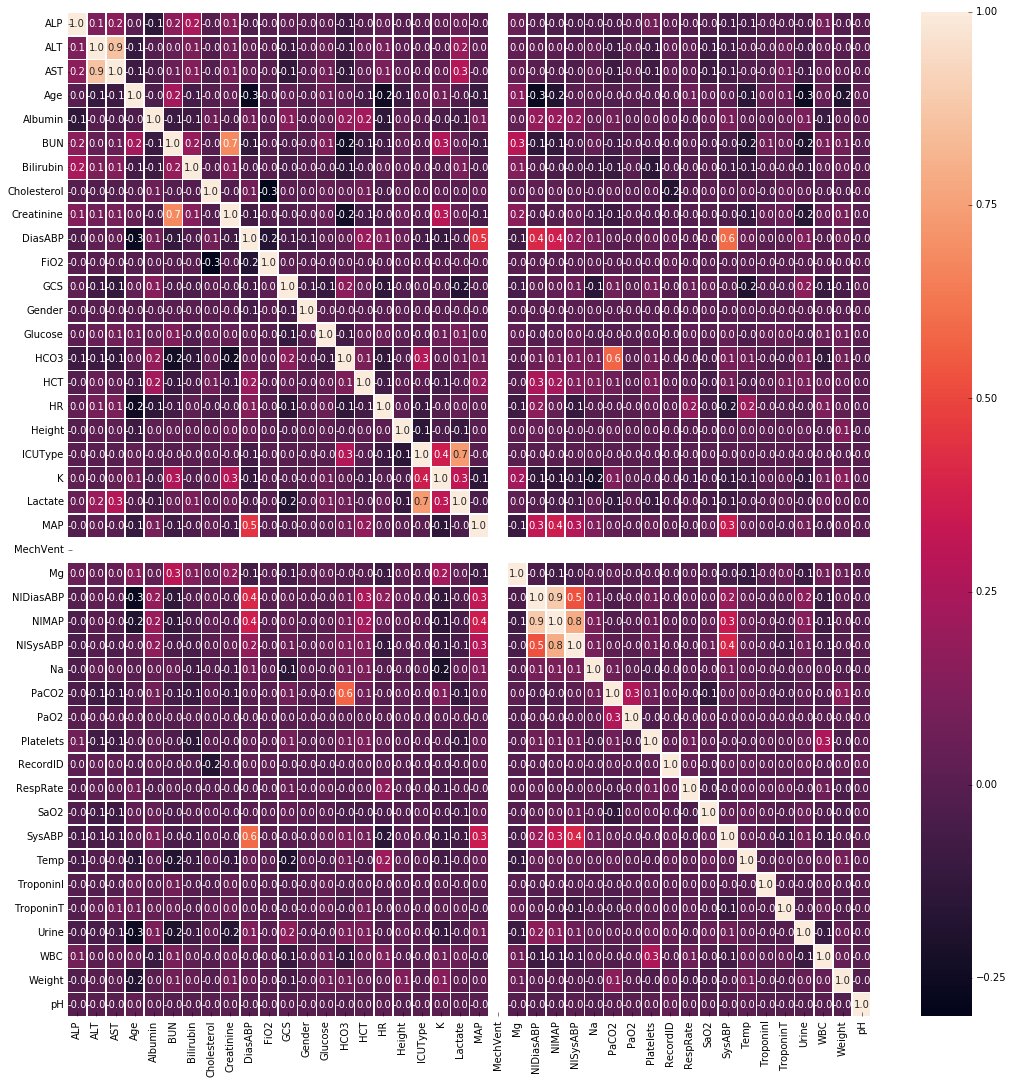

In [11]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='.1f')
plt.show()

In [12]:
data_corr=data.drop(['MechVent','RecordID','ICUType','NIMAP','Gender','AST','PaCO2','SysABP'],axis=1)

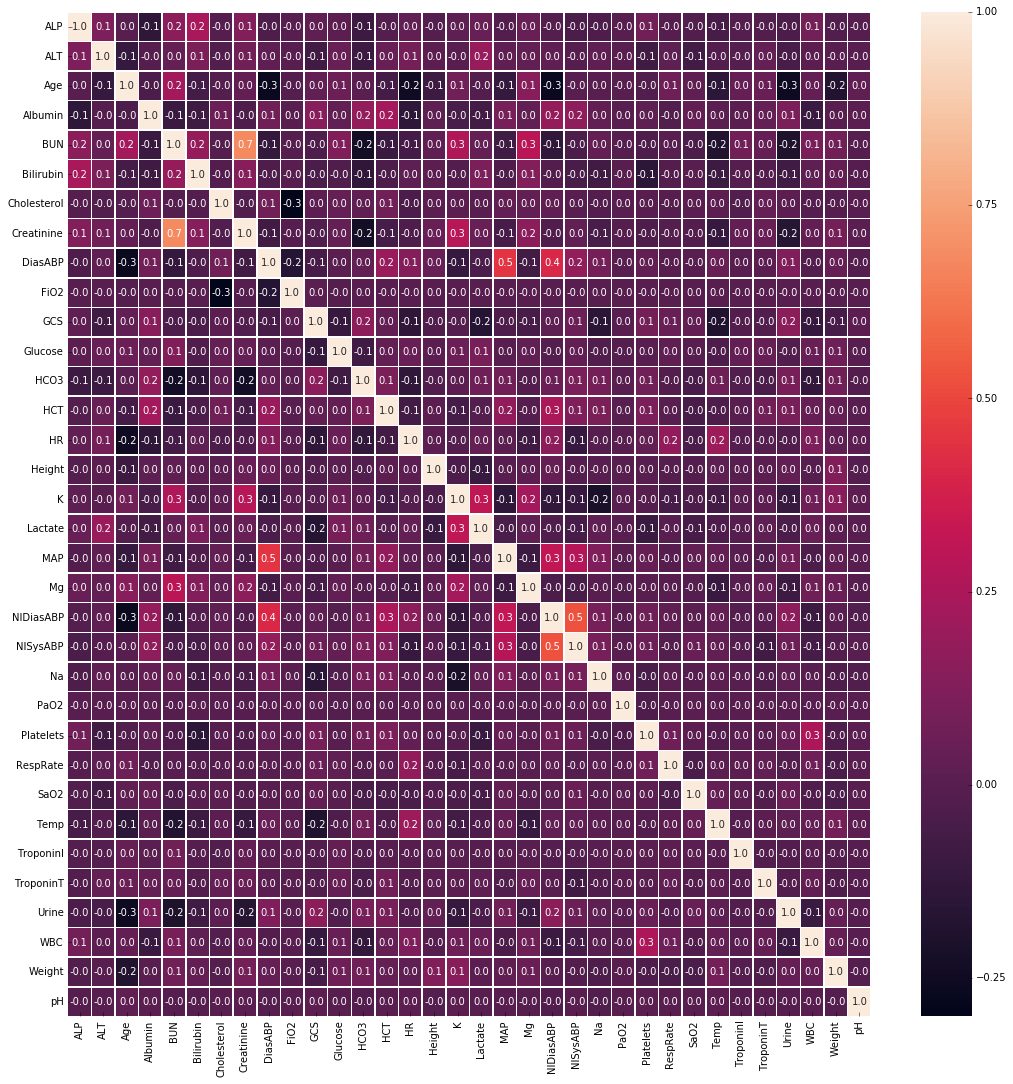

In [13]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(data_corr.corr(),annot=True,linewidth=0.5,fmt='.1f')
plt.show()

In [14]:
len(data_corr.columns)

34

In [15]:
from sklearn.preprocessing import MinMaxScaler
#normalization
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(data_corr)

In [16]:
type(df)

numpy.ndarray

In [17]:
data_labels=[]
for i in labels["In-hospital_death"]:
    if i == 0:
        data_labels.append([1,0])
    else:
        data_labels.append([0,1])
data_labels = np.array(data_labels)

In [18]:
data_labels.shape

(3999, 2)

In [19]:
data_label_1=labels[labels["In-hospital_death"]==1].index
data_label_0=labels[labels["In-hospital_death"]==0].index


In [20]:
len(data_label_1)

554

In [21]:
data_1=df[data_label_1]
data_0=df[data_label_0]

In [22]:
label_1=data_labels[data_label_1]
label_0=data_labels[data_label_0]


In [23]:
label_1[0]

array([0, 1])

In [24]:
X=np.concatenate((data_1,data_0[:554]),axis=0)
y=np.concatenate((label_1,label_0[:554]),axis=0)

In [25]:
len(y)

1108

In [26]:
y[4]

array([0, 1])

In [27]:
perm=np.random.permutation(len(X))
X=X[perm]
y=y[perm]

In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
X_train, X_test, y_train, y_test = tts( X, y, test_size=0.1, random_state=42)

In [30]:
unique, counts = np.unique(y_test, return_counts=True)
print(list(zip(unique, counts)))


[(0, 111), (1, 111)]


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy ",accuracy_score(y_pred,y_test))


accuracy  0.7027027027027027


In [34]:
print(confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
#[tn, fp, 
#fn, tp]

[[43  7]
 [17 44]]


In [35]:
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

0.7213114754098361


In [36]:
from sklearn.metrics import recall_score,precision_score

In [37]:
print(recall_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))

0.7213114754098361


In [38]:
from keras.models import Model
from keras.layers import Input,Dense,Dropout,Conv1D,MaxPooling1D,Flatten,Activation,BatchNormalization
from keras.optimizers import Adam,RMSprop,SGD,Nadam,Adagrad
from keras.losses import mean_squared_error,binary_crossentropy
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers


Using TensorFlow backend.


In [39]:
from sklearn.utils.class_weight import compute_class_weight

In [44]:
def make_model():
    inputs=Input(shape=(len(data_corr.columns),))
    l=Dense(256)(inputs)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.25)(l)
    
    
    l=Dense(128)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.25)(l)
    
    l=Dense(128)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dense(64)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.25)(l)
    
    l=Dense(64)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dense(32)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.25)(l)
    
    l=Dense(32)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dense(16)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.3)(l)
    
    l=Dense(16)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.3)(l)
    
    l=Dense(8)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.5)(l)
    
    
    l=Dense(2,activation='sigmoid')(l)
    outputs=l
    return inputs,outputs
    
    
    
    

In [45]:
inputs,outputs=make_model()
model=Model(inputs=inputs,outputs=outputs)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 34)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               8960      
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
__________

In [46]:
model.compile(loss='binary_crossentropy',
            optimizer=Adam(lr=0.001),
           metrics=['accuracy'])


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 3s 4ms/step - loss: 0.8890 - acc: 0.4814 - val_loss: 0.7033 - val_acc: 0.5315
Epoch 2/100
997/997 [==============================] - 0s 132us/step - loss: 0.8725 - acc: 0.5025 - val_loss: 0.6951 - val_acc: 0.5405
Epoch 3/100
997/997 [==============================] - 0s 133us/step - loss: 0.8347 - acc: 0.5020 - val_loss: 0.6988 - val_acc: 0.5180
Epoch 4/100
997/997 [==============================] - 0s 127us/step - loss: 0.8478 - acc: 0.4885 - val_loss: 0.6892 - val_acc: 0.5270
Epoch 5/100
997/997 [==============================] - 0s 113us/step - loss: 0.8114 - acc: 0.5050 - val_loss: 0.6872 - val_acc: 0.5135
Epoch 6/100
997/997 [==============================] - 0s 122us/step - loss: 0.7939 - acc: 0.5281 - val_loss: 0.6743 - val_acc: 0.5631
Epoch 7/100
997/997 [==============================] - 0s 125us/step - loss: 0.7842 - acc: 0.4995 - val_loss: 0.6624 - val_acc: 0.5541
Epoch 8/100

Epoch 61/100
997/997 [==============================] - 0s 117us/step - loss: 0.5810 - acc: 0.6871 - val_loss: 0.5516 - val_acc: 0.6982
Epoch 62/100
997/997 [==============================] - 0s 112us/step - loss: 0.5589 - acc: 0.7066 - val_loss: 0.5531 - val_acc: 0.7072
Epoch 63/100
997/997 [==============================] - 0s 108us/step - loss: 0.5730 - acc: 0.6896 - val_loss: 0.5521 - val_acc: 0.7117
Epoch 64/100
997/997 [==============================] - 0s 108us/step - loss: 0.5564 - acc: 0.7066 - val_loss: 0.5491 - val_acc: 0.7027
Epoch 65/100
997/997 [==============================] - 0s 111us/step - loss: 0.5574 - acc: 0.7222 - val_loss: 0.5387 - val_acc: 0.7117
Epoch 66/100
997/997 [==============================] - 0s 103us/step - loss: 0.5487 - acc: 0.7312 - val_loss: 0.5307 - val_acc: 0.7297
Epoch 67/100
997/997 [==============================] - 0s 113us/step - loss: 0.5776 - acc: 0.6936 - val_loss: 0.5194 - val_acc: 0.7387
Epoch 68/100
997/997 [==========================

In [51]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 136us/step - loss: 0.4594 - acc: 0.7994 - val_loss: 0.5689 - val_acc: 0.7387
Epoch 2/50
997/997 [==============================] - 0s 115us/step - loss: 0.4733 - acc: 0.7688 - val_loss: 0.5667 - val_acc: 0.7252
Epoch 3/50
997/997 [==============================] - 0s 112us/step - loss: 0.4670 - acc: 0.7919 - val_loss: 0.5456 - val_acc: 0.7207
Epoch 4/50
997/997 [==============================] - 0s 110us/step - loss: 0.4543 - acc: 0.7984 - val_loss: 0.5641 - val_acc: 0.7027
Epoch 5/50
997/997 [==============================] - 0s 121us/step - loss: 0.4495 - acc: 0.7864 - val_loss: 0.5761 - val_acc: 0.7117
Epoch 6/50
997/997 [==============================] - 0s 112us/step - loss: 0.4691 - acc: 0.7944 - val_loss: 0.6112 - val_acc: 0.7072
Epoch 7/50
997/997 [==============================] - 0s 108us/step - loss: 0.4544 - acc: 0.8069 - val_loss: 0.6174 - val_acc: 0.7072
Epoch 8/50
997/9

In [54]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 143us/step - loss: 0.3789 - acc: 0.8511 - val_loss: 0.6297 - val_acc: 0.7387
Epoch 2/50
997/997 [==============================] - 0s 128us/step - loss: 0.3246 - acc: 0.8791 - val_loss: 0.6511 - val_acc: 0.7387
Epoch 3/50
997/997 [==============================] - 0s 126us/step - loss: 0.3447 - acc: 0.8756 - val_loss: 0.7188 - val_acc: 0.7568
Epoch 4/50
997/997 [==============================] - 0s 115us/step - loss: 0.3533 - acc: 0.8696 - val_loss: 0.7824 - val_acc: 0.7477
Epoch 5/50
997/997 [==============================] - 0s 125us/step - loss: 0.3484 - acc: 0.8751 - val_loss: 0.7699 - val_acc: 0.7477
Epoch 6/50
997/997 [==============================] - 0s 118us/step - loss: 0.3275 - acc: 0.8666 - val_loss: 0.7882 - val_acc: 0.7117
Epoch 7/50
997/997 [==============================] - 0s 146us/step - loss: 0.3278 - acc: 0.8751 - val_loss: 0.7334 - val_acc: 0.7432
Epoch 8/50
997/9

In [56]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 140us/step - loss: 0.2603 - acc: 0.9147 - val_loss: 0.8424 - val_acc: 0.6937
Epoch 2/50
997/997 [==============================] - 0s 127us/step - loss: 0.2537 - acc: 0.9228 - val_loss: 0.8176 - val_acc: 0.7207
Epoch 3/50
997/997 [==============================] - 0s 126us/step - loss: 0.2407 - acc: 0.9248 - val_loss: 0.8068 - val_acc: 0.7477
Epoch 4/50
997/997 [==============================] - 0s 116us/step - loss: 0.2333 - acc: 0.9132 - val_loss: 0.8080 - val_acc: 0.7477
Epoch 5/50
997/997 [==============================] - 0s 133us/step - loss: 0.2332 - acc: 0.9198 - val_loss: 0.7433 - val_acc: 0.7658
Epoch 6/50
997/997 [==============================] - 0s 117us/step - loss: 0.2483 - acc: 0.9102 - val_loss: 0.7257 - val_acc: 0.7748
Epoch 7/50
997/997 [==============================] - 0s 150us/step - loss: 0.2476 - acc: 0.9213 - val_loss: 0.7417 - val_acc: 0.7658
Epoch 8/50
997/9

In [60]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

[[41  9]
 [15 46]]
0.7540983606557377


In [67]:
pred_1=model.predict(data_0[554:])
print("Accuracy_score:",accuracy_score(np.argmax(label_0[554:],axis=1),np.argmax(pred_1,axis=1)))

Accuracy_score: 0.7004496713939813


In [62]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 133us/step - loss: 0.1659 - acc: 0.9458 - val_loss: 0.9269 - val_acc: 0.8018
Epoch 2/50
997/997 [==============================] - 0s 119us/step - loss: 0.1472 - acc: 0.9498 - val_loss: 0.9597 - val_acc: 0.7928
Epoch 3/50
997/997 [==============================] - 0s 115us/step - loss: 0.1533 - acc: 0.9564 - val_loss: 1.1054 - val_acc: 0.7568
Epoch 4/50
997/997 [==============================] - 0s 122us/step - loss: 0.1497 - acc: 0.9463 - val_loss: 1.0806 - val_acc: 0.7928
Epoch 5/50
997/997 [==============================] - 0s 117us/step - loss: 0.1520 - acc: 0.9544 - val_loss: 1.0632 - val_acc: 0.7793
Epoch 6/50
997/997 [==============================] - 0s 120us/step - loss: 0.1547 - acc: 0.9488 - val_loss: 0.9700 - val_acc: 0.8108
Epoch 7/50
997/997 [==============================] - 0s 112us/step - loss: 0.1409 - acc: 0.9589 - val_loss: 0.9587 - val_acc: 0.7838
Epoch 8/50
997/9

In [65]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 124us/step - loss: 0.1185 - acc: 0.9659 - val_loss: 1.3281 - val_acc: 0.7027
Epoch 2/50
997/997 [==============================] - 0s 124us/step - loss: 0.1223 - acc: 0.9594 - val_loss: 1.3505 - val_acc: 0.7162
Epoch 3/50
997/997 [==============================] - 0s 117us/step - loss: 0.1253 - acc: 0.9579 - val_loss: 1.3705 - val_acc: 0.7297
Epoch 4/50
997/997 [==============================] - 0s 118us/step - loss: 0.1258 - acc: 0.9519 - val_loss: 1.2678 - val_acc: 0.7477
Epoch 5/50
997/997 [==============================] - 0s 118us/step - loss: 0.1309 - acc: 0.9493 - val_loss: 1.2345 - val_acc: 0.7568
Epoch 6/50
997/997 [==============================] - 0s 122us/step - loss: 0.1091 - acc: 0.9689 - val_loss: 1.2392 - val_acc: 0.7387
Epoch 7/50
997/997 [==============================] - 0s 114us/step - loss: 0.1199 - acc: 0.9609 - val_loss: 1.2372 - val_acc: 0.7748
Epoch 8/50
997/9

In [68]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 120us/step - loss: 0.1172 - acc: 0.9529 - val_loss: 1.2639 - val_acc: 0.7477
Epoch 2/50
997/997 [==============================] - 0s 115us/step - loss: 0.1273 - acc: 0.9569 - val_loss: 1.2763 - val_acc: 0.7162
Epoch 3/50
997/997 [==============================] - 0s 115us/step - loss: 0.1117 - acc: 0.9689 - val_loss: 1.2973 - val_acc: 0.7342
Epoch 4/50
997/997 [==============================] - 0s 112us/step - loss: 0.1375 - acc: 0.9539 - val_loss: 1.3299 - val_acc: 0.7568
Epoch 5/50
997/997 [==============================] - 0s 109us/step - loss: 0.1161 - acc: 0.9609 - val_loss: 1.3570 - val_acc: 0.7477
Epoch 6/50
997/997 [==============================] - 0s 119us/step - loss: 0.1002 - acc: 0.9689 - val_loss: 1.3424 - val_acc: 0.7297
Epoch 7/50
997/997 [==============================] - 0s 119us/step - loss: 0.1041 - acc: 0.9704 - val_loss: 1.3231 - val_acc: 0.7252
Epoch 8/50
997/9

In [71]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 125us/step - loss: 0.0965 - acc: 0.9634 - val_loss: 1.3875 - val_acc: 0.7658
Epoch 2/50
997/997 [==============================] - 0s 125us/step - loss: 0.1234 - acc: 0.9574 - val_loss: 1.4856 - val_acc: 0.7568
Epoch 3/50
997/997 [==============================] - 0s 117us/step - loss: 0.1098 - acc: 0.9639 - val_loss: 1.5889 - val_acc: 0.7027
Epoch 4/50
997/997 [==============================] - 0s 115us/step - loss: 0.1074 - acc: 0.9664 - val_loss: 1.6779 - val_acc: 0.6757
Epoch 5/50
997/997 [==============================] - 0s 118us/step - loss: 0.1273 - acc: 0.9639 - val_loss: 1.6760 - val_acc: 0.6667
Epoch 6/50
997/997 [==============================] - 0s 117us/step - loss: 0.1103 - acc: 0.9659 - val_loss: 1.7387 - val_acc: 0.6757
Epoch 7/50
997/997 [==============================] - 0s 123us/step - loss: 0.0930 - acc: 0.9739 - val_loss: 1.8005 - val_acc: 0.6847
Epoch 8/50
997/9

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=115,batch_size=128,verbose=1)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100,batch_size=128,verbose=1)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=300,batch_size=128,verbose=1)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=200,batch_size=128,verbose=1)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=500,batch_size=128,verbose=1)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=1500,batch_size=128,verbose=1)

In [49]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))

[[39 11]
 [17 44]]


In [50]:
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

0.7213114754098361


In [52]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))

[[32 18]
 [12 49]]


In [53]:
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

0.7313432835820896


In [55]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

[[43  7]
 [27 34]]
0.5573770491803278


In [57]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

[[37 13]
 [14 47]]
0.7704918032786885


In [58]:
pred_1=model.predict(data_0[554:])
print(accuracy_score(np.argmax(label_0[554:],axis=1),np.argmax(pred_1,axis=1)))

0.6568661362850224


In [61]:
pred_1=model.predict(data_0[554:])
print(accuracy_score(np.argmax(label_0[554:],axis=1),np.argmax(pred_1,axis=1)))

0.700103770321688


In [63]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print("Score:",score_rf)

[[34 16]
 [14 47]]
Score: 0.746031746031746


In [64]:
pred_1=model.predict(data_0[554:])
print("Accuracy_score:",accuracy_score(np.argmax(label_0[554:],axis=1),np.argmax(pred_1,axis=1)))

Accuracy_score: 0.5970252507782774


In [66]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print("Score:",score_rf)

[[40 10]
 [19 42]]
Score: 0.6885245901639344


In [69]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print("Score:",score_rf)

[[38 12]
 [14 47]]
Score: 0.7704918032786885


In [70]:
pred_1=model.predict(data_0[554:])
print("Accuracy_score:",accuracy_score(np.argmax(label_0[554:],axis=1),np.argmax(pred_1,axis=1)))

Accuracy_score: 0.6558284330681425


In [72]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print("Score:",score_rf)

[[33 17]
 [ 7 54]]
Score: 0.7605633802816901


In [73]:
pred_1=model.predict(data_0[554:])
print("Accuracy_score:",accuracy_score(np.argmax(label_0[554:],axis=1),np.argmax(pred_1,axis=1)))

Accuracy_score: 0.5399515738498789


In [ ]:
print(recall_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))

In [ ]:
pred_1[5]

In [ ]:
label_0[4]

In [ ]:
import keras.backend as k

In [ ]:
k.set_value(model.optimizer.lr,0.0001)

In [ ]:
model.fit(df,labels,validation_split=0.1, epochs=50, batch_size=32, verbose=1)